Вариант №10

## Задание:
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Модель №1: Метод опорных векторов

Модель №2: Градиентный бустинг

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from pandas import DataFrame
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [80]:
data = pd.read_csv('hotel_bookings.csv')

In [81]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [82]:
data.isnull().sum()

In [83]:
data.shape

(119390, 32)

In [84]:
data.dtypes

### Выполним предобработку данных.

Вначале посмотрим в каких полях (числовой тип данных) есть пропущенные значения, а также посмотрим на их количество. Выберем стратегию и заполним пустые значения. 
Далее сделаем аналогично, но для категориальный данных. Также удалим столбцы, в которых очень много пропусков. Затем выполним кодирование категориальный признаков.

In [85]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка children. Тип данных float64. Количество пустых значений 4, 0.0%.
Колонка agent. Тип данных float64. Количество пустых значений 16340, 13.69%.
Колонка company. Тип данных float64. Количество пустых значений 112593, 94.31%.


In [86]:
data_num = data[num_cols]
data_num

,children,agent,company
0,0.0,NaN,NaN
1,0.0,NaN,NaN
2,0.0,NaN,NaN
3,0.0,304.0,NaN
4,0.0,240.0,NaN
...,...,...,...
119385,0.0,394.0,NaN
119386,0.0,9.0,NaN
119387,0.0,9.0,NaN
119388,0.0,89.0,NaN


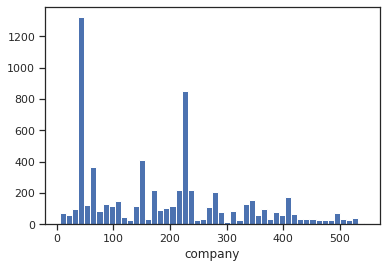

In [87]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [88]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for column in ["children", "agent"]:
    imp_most_frequent.fit(data[[column]])
    data[column] = imp_most_frequent.transform(data[[column]])

In [89]:
data = data.drop(columns=["company"], axis=1)

In [90]:
data.isnull().sum()

In [91]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка country. Тип данных object. Количество пустых значений 488, 0.41%.


In [92]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data["country"] = imp.fit_transform(data[["country"]])

In [93]:
data.isnull().sum()

In [95]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for column in ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status", "reservation_status_date"]:
    data[column] = LE.fit_transform(data[column])

In [96]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,9.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,9.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,9.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,123


Посмотрим корреляционную матрицу.

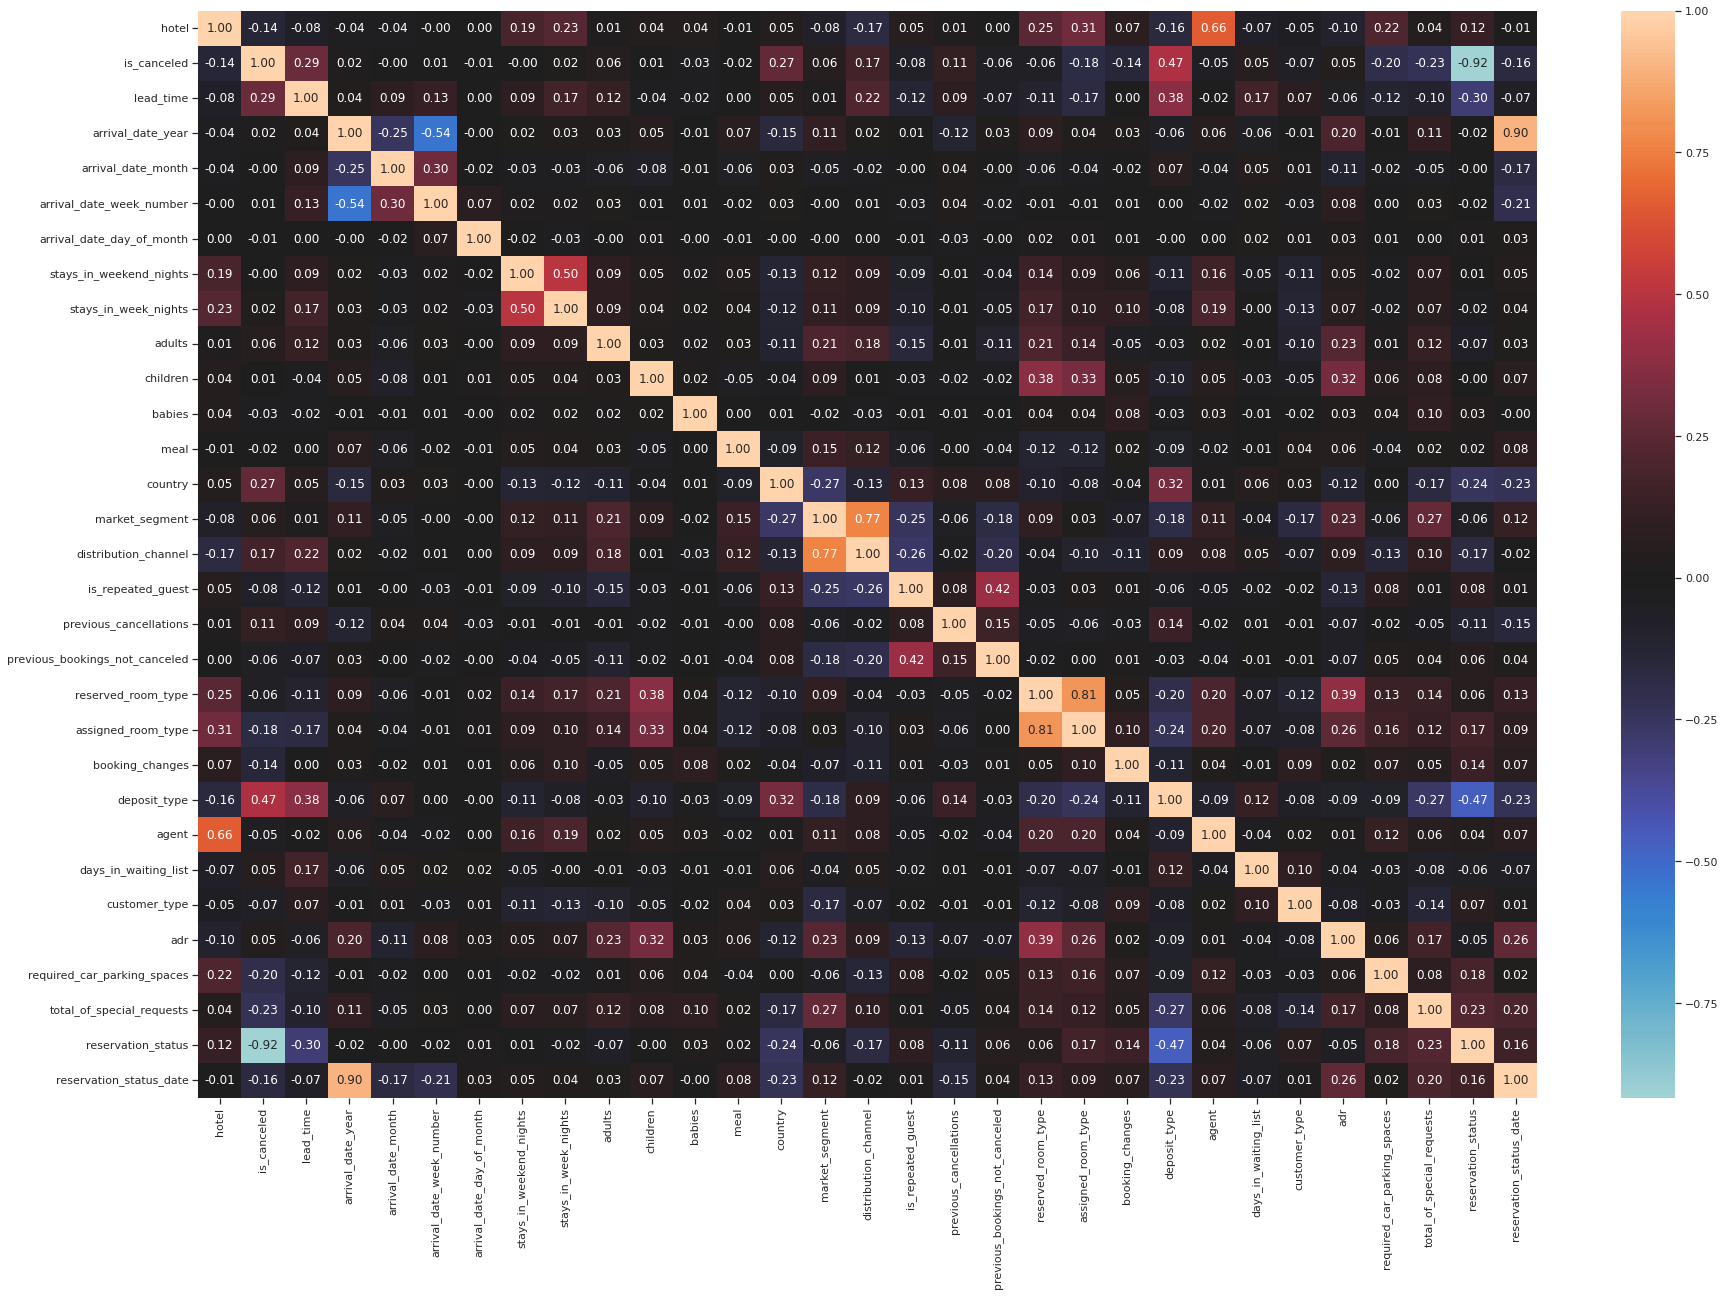

In [97]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=0)

Будем решать задачу регрессии.

В качестве первой модели будет использоваться метод опорных векторов (библиотека sklearn). 

Вначале сделаем масштабирование данных, затем разделим выборку на тестовую и обучающую. Обучим модель и предскажем значения на тестовой выборке. 

In [71]:
data_svm=data

In [21]:
data_svm.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,9.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,9.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,9.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,123


In [22]:
data_x_SVM = ['arrival_date_year', 'adults', 'children', 'market_segment', 'reserved_room_type', 'assigned_room_type', 'total_of_special_requests', 'reservation_status_date', 'adr']

In [24]:
# Масштабирование данных в диапазоне от 0 до 1
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_svm[data_x_SVM])

In [25]:
sc1_data = DataFrame(sc1_data)
sc1_data.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.036364,0.0,0.428571,0.222222,0.181818,0.0,0.130811,0.001180
1,0.0,0.036364,0.0,0.428571,0.222222,0.181818,0.0,0.130811,0.001180
2,0.0,0.018182,0.0,0.428571,0.000000,0.181818,0.0,0.131892,0.015053
3,0.0,0.018182,0.0,0.285714,0.000000,0.000000,0.0,0.131892,0.015053
4,0.0,0.036364,0.0,0.857143,0.000000,0.000000,0.2,0.132973,0.019307


In [26]:
x_Array = sc1_data.drop(8, axis=1)
y_Array = sc1_data[8]

In [27]:
#Разделяем выборку
train_X, test_X, train_Y, test_Y = train_test_split(x_Array, y_Array, test_size=0.20, random_state=1)

In [74]:
model_svr = SVR(kernel = 'rbf', C = 0.1)
model_svr.fit(train_X,train_Y)

SVR(C=0.1)

In [75]:
y_test_predict_svr = model_svr.predict(test_X)
y_test_predict_svr

In [76]:
print('MSE:', mean_squared_error(test_Y, y_test_predict_svr))
print('MAE:', (mean_absolute_error(test_Y, y_test_predict_svr)))

MSE: 0.006645928339088202
MAE: 0.08102097258743671


В качестве второй модели будет использоваться модель градиентного бустинга (библиотека XGBoost). 

Вначале разделим выборку на тестовую и обучающую. Обучим модель и предскажем значения на тестовой выборке. Оценим значения метрик.

In [98]:
x__Array = data.drop('adr', axis=1)
y__Array = data['adr']

In [99]:
#Разделяем выборку для обучения модели
train__X, test__X, train__Y, test__Y = train_test_split(x__Array, y__Array, test_size=0.20, random_state=1)

In [82]:
model_XGBR = XGBRegressor( booster='dart', max_depth=10, eta=0.1)
model_XGBR.fit(train__X, train__Y)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [83]:
y_test_predict_XGBR = model_XGBR.predict(test__X)
y_test_predict_XGBR

In [84]:
print('MSE:', mean_squared_error(test__Y, y_test_predict_XGBR))
print('MAE:', (mean_absolute_error(test__Y, y_test_predict_XGBR)))

MSE: 220.7892663166964
MAE: 8.53116186376068


Таким образом при решении задачи регрессии использовались две метрики: среднеквадратичная ошибка и средняя абсолютная ошибка. 

Значение метрик показали, что метод опорных векторов обучился и предсказал значения лучше, чем модель градиентного бустига. 